In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats # hypothesis testing - t test , z test anova etc ..

##### fetching of data set

In [3]:
df=pd.read_csv(r"C:\Users\HP\Desktop\DS\PGA44\Regression\Car_sales.csv")

#### basic exploration of data 

In [4]:
# 1. row, columns, datatypes, head, tail,info

In [5]:
df.shape

(157, 16)

In [6]:
df.dtypes

Manufacturer               object
Model                      object
Sales_in_thousands        float64
four_year_resale_value    float64
Vehicle_type               object
Price_in_thousands        float64
Engine_size               float64
Horsepower                float64
Wheelbase                 float64
Width                     float64
Length                    float64
Curb_weight               float64
Fuel_capacity             float64
Fuel_efficiency           float64
Latest_Launch              object
Power_perf_factor         float64
dtype: object

In [7]:
df.head()

,Manufacturer,Model,Sales_in_thousands,four_year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Manufacturer            157 non-null    object 
 1   Model                   157 non-null    object 
 2   Sales_in_thousands      157 non-null    float64
 3   four_year_resale_value  121 non-null    float64
 4   Vehicle_type            157 non-null    object 
 5   Price_in_thousands      155 non-null    float64
 6   Engine_size             156 non-null    float64
 7   Horsepower              156 non-null    float64
 8   Wheelbase               156 non-null    float64
 9   Width                   156 non-null    float64
 10  Length                  156 non-null    float64
 11  Curb_weight             155 non-null    float64
 12  Fuel_capacity           156 non-null    float64
 13  Fuel_efficiency         154 non-null    float64
 14  Latest_Launch           157 non-null    ob

In [9]:
# EDA - Exploratory data Analysis 
#1. Univariate Analysis -( Study each variable one by one)
#     a. Numerical Var- (missing, min, max, mean, median, std, var, skewness, kurtosis, distribution (decile, percentile))
#     b. Categorical Var- (missing , mode, freq distr, unique values)
# 2. Bivariate Analysis - (Study two variable at a time)
#     a. Numerical - Numerical (age-income) (relationship - correlation, graphs-scattered)
#     b. Numerical - Categorical (Income - gender) (group by summary, relationship - hypothesis test)
#     c. categorical to categorical (Gender-education) (crosstab, relationship - chisquare)

In [10]:
df.dtypes[df.dtypes=="object"].index  # list of objective Variables

Index(['Manufacturer', 'Model', 'Vehicle_type', 'Latest_Launch'], dtype='object')

In [11]:
df["Manufacturer"].isnull().sum()  # missing value

0

In [12]:
df["Manufacturer"].mode()  # mode

0    Dodge
1     Ford
Name: Manufacturer, dtype: object

In [13]:
df["Manufacturer"].value_counts()  # Frequency count

Manufacturer
Dodge         11
Ford          11
Toyota         9
Chevrolet      9
Mercedes-B     9
Mitsubishi     7
Nissan         7
Chrysler       7
Volvo          6
Oldsmobile     6
Lexus          6
Mercury        6
Pontiac        6
Volkswagen     6
Saturn         5
Cadillac       5
Honda          5
Plymouth       4
Acura          4
Buick          4
Audi           3
Jeep           3
Porsche        3
Hyundai        3
BMW            3
Lincoln        3
Saab           2
Subaru         2
Jaguar         1
Infiniti       1
Name: count, dtype: int64

<Axes: xlabel='Manufacturer'>

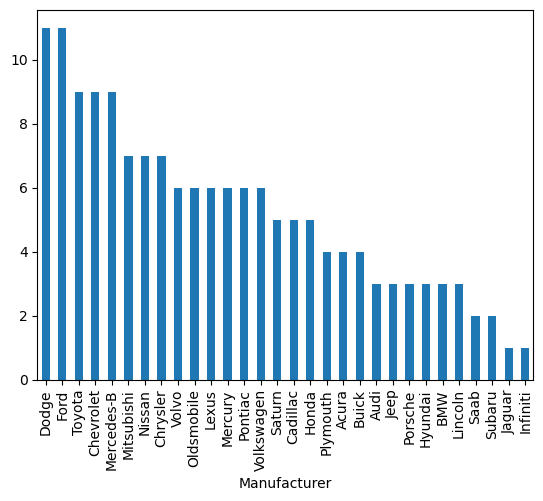

In [14]:
df["Manufacturer"].value_counts().plot(kind="bar")

In [15]:
df["Model"].isnull().sum()

0

In [16]:
df["Model"].mode()

0    Neon
Name: Model, dtype: object

In [17]:
df[df["Model"]=="Neon"]

,Manufacturer,Model,Sales_in_thousands,four_year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
35,Dodge,Neon,76.034,7.75,Passenger,12.64,2.0,132.0,105.0,74.4,174.4,2.567,12.5,29.0,12/12/2011,52.084899
114,Plymouth,Neon,32.734,7.75,Passenger,12.64,2.0,132.0,105.0,74.4,174.4,2.559,12.5,29.0,4/26/2011,52.084899


In [18]:
df["Model"].value_counts()

Model
Neon          2
Integra       1
Cutlass       1
Sentra        1
Altima        1
             ..
Windstar      1
Expedition    1
Ranger        1
F-Series      1
S80           1
Name: count, Length: 156, dtype: int64

In [19]:
df["Vehicle_type"].isnull().sum()

0

In [20]:
df["Vehicle_type"].mode()

0    Passenger
Name: Vehicle_type, dtype: object

In [21]:
df["Vehicle_type"].value_counts()

Vehicle_type
Passenger    116
Car           41
Name: count, dtype: int64

In [22]:
df["Latest_Launch"] # type casting - changing data type 

0        2/2/2012
1        6/3/2011
2        1/4/2012
3       3/10/2011
4       10/8/2011
          ...    
152     9/21/2011
153    11/24/2012
154     6/25/2011
155     4/26/2011
156    11/14/2011
Name: Latest_Launch, Length: 157, dtype: object

In [23]:
df["Latest_Launch"]=pd.to_datetime(df["Latest_Launch"])

In [24]:
df.dtypes[df.dtypes!="object"].index 

Index(['Sales_in_thousands', 'four_year_resale_value', 'Price_in_thousands',
       'Engine_size', 'Horsepower', 'Wheelbase', 'Width', 'Length',
       'Curb_weight', 'Fuel_capacity', 'Fuel_efficiency', 'Latest_Launch',
       'Power_perf_factor'],
      dtype='object')

In [25]:
df["Sales_in_thousands"].isnull().sum()

0

In [26]:
df["Sales_in_thousands"].min()*1000

110.0

In [27]:
df[df["Sales_in_thousands"]==.11]

,Manufacturer,Model,Sales_in_thousands,four_year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
83,Mitsubishi,3000GT,0.11,20.94,Passenger,25.45,3.0,161.0,97.2,72.4,180.3,3.131,19.8,21.0,2012-06-29,67.544155


In [28]:
df["Sales_in_thousands"].max()

540.561

In [29]:
df[df["Sales_in_thousands"]==540.561]

,Manufacturer,Model,Sales_in_thousands,four_year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
56,Ford,F-Series,540.561,15.075,Car,26.935,4.6,220.0,138.5,79.1,224.5,4.241,25.1,18.0,2012-08-16,89.401935


In [30]:
df["Sales_in_thousands"].mean()

52.99807643312102

In [31]:
df["Sales_in_thousands"].skew()  # skewness - is data positive or negative skewed or it is normal distributed 
# if value > 0 - positive skewed (right skewed)
# if value <0 - negative skewed ( left skewed)
# if value =0 - data normal 

3.408518366470572

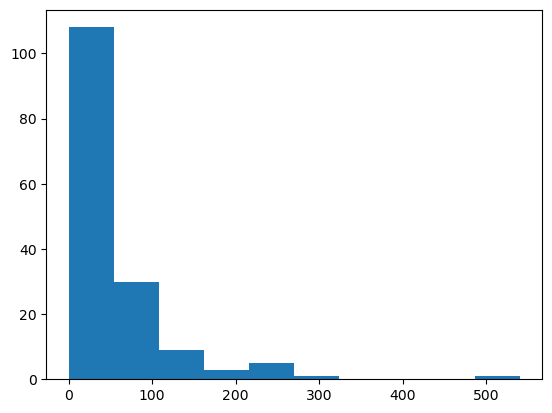

In [32]:
plt.hist(df["Sales_in_thousands"])
plt.show()

In [33]:
df["Sales_in_thousands"].quantile([.25,.5,.75,.8,.9])

0.25     14.1140
0.50     29.4500
0.75     67.9560
0.80     80.1746
0.90    127.6416
Name: Sales_in_thousands, dtype: float64

In [34]:
df["Sales_in_thousands"].describe(percentiles=[0.01,.02,.03,.04,.05,.1,.2,.25,.5,.75,.9,.95])

count    157.000000
mean      52.998076
std       68.029422
min        0.110000
1%         0.937280
2%         1.132160
3%         1.348000
4%         1.607600
5%         1.870800
10%        5.453600
20%       11.215400
25%       14.114000
50%       29.450000
75%       67.956000
90%      127.641600
95%      185.336200
max      540.561000
Name: Sales_in_thousands, dtype: float64

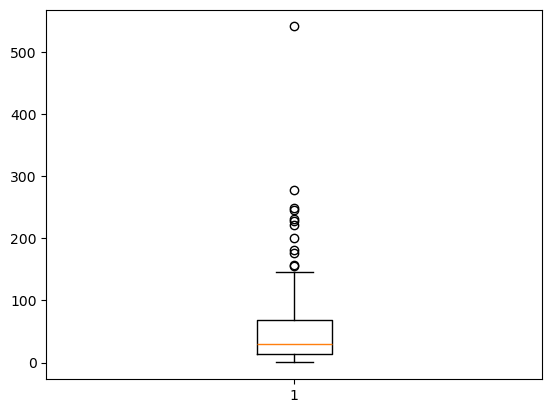

In [35]:
plt.boxplot(df["Sales_in_thousands"])
plt.show()

In [36]:
df["Price_in_thousands"].isnull().sum()  # missing value

2

In [37]:
df[df["Price_in_thousands"].isnull()] # data for missing value 

,Manufacturer,Model,Sales_in_thousands,four_year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.47,17.2,26.0,2012-01-04,NaN
33,Chrysler,Town & Country,53.480,19.540,Car,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011-07-13,NaN


In [38]:
df["Price_in_thousands"].min()

9.235

In [39]:
df["Price_in_thousands"].max()

85.5

In [40]:
df[df["Price_in_thousands"]==85.5]

,Manufacturer,Model,Sales_in_thousands,four_year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
99,Mercedes-B,CL500,0.954,NaN,Passenger,85.5,5.0,302.0,113.6,73.1,196.6,4.115,23.2,20.0,2011-04-11,141.100985


In [41]:
df["Price_in_thousands"].mean()

27.390754838709682

In [42]:
df["Price_in_thousands"].skew()

1.765734331031903

C:\Users\HP\AppData\Local\Temp\ipykernel_4364\740792973.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Price_in_thousands"])


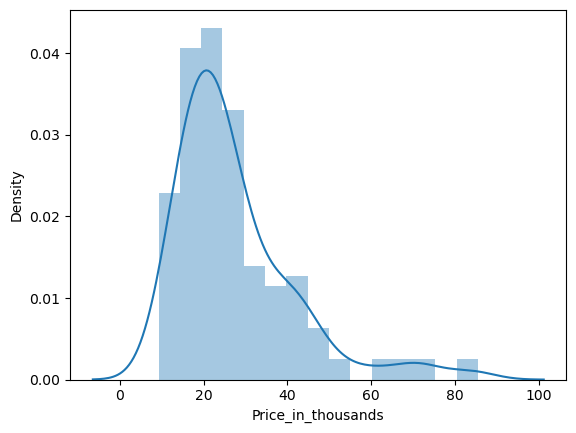

In [43]:
sns.distplot(df["Price_in_thousands"])
plt.show()

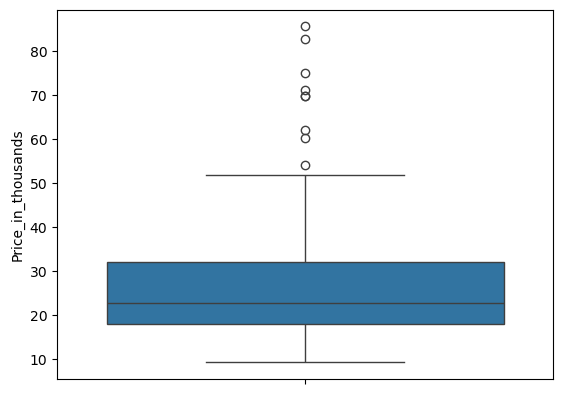

In [44]:
sns.boxplot(data=df, y=df["Price_in_thousands"])
plt.show()

In [45]:
df[df["Price_in_thousands"]>53]

,Manufacturer,Model,Sales_in_thousands,four_year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
6,Audi,A8,1.380,39.000,Passenger,62.000,4.2,310.0,113.0,74.0,198.2,3.902,23.7,21.0,2012-02-27,134.656858
39,Dodge,Viper,0.916,58.470,Passenger,69.725,8.0,450.0,96.2,75.7,176.7,3.375,19.0,16.0,2011-08-07,188.144323
73,Lexus,LS400,6.375,40.375,Passenger,54.005,4.0,290.0,112.2,72.0,196.7,3.890,22.5,22.0,2012-03-29,124.446716
74,Lexus,LX470,9.126,NaN,Car,60.105,4.7,230.0,112.2,76.4,192.5,5.401,25.4,15.0,2012-10-30,105.760458
94,Mercedes-B,S-Class,16.774,50.375,Passenger,69.700,4.3,275.0,121.5,73.1,203.1,4.133,23.2,21.0,2011-06-13,125.273876
95,Mercedes-B,SL-Class,3.311,58.600,Passenger,82.600,5.0,302.0,99.0,71.3,177.1,4.125,21.1,20.0,2011-03-17,139.982294
99,Mercedes-B,CL500,0.954,NaN,Passenger,85.500,5.0,302.0,113.6,73.1,196.6,4.115,23.2,20.0,2011-04-11,141.100985
125,Porsche,Carrera Coupe,1.280,60.625,Passenger,71.020,3.4,300.0,92.6,69.5,174.5,3.032,17.0,21.0,2012-12-21,134.390975
126,Porsche,Carrera Cabrio,1.866,67.550,Passenger,74.970,3.4,300.0,92.6,69.5,174.5,3.075,17.0,23.0,2011-07-11,135.914710


In [46]:
# Please do the same univariate analysis on remaining variables 

#### Bivariate Analysis 

In [47]:
# 2. Bivariate Analysis - (Study two variable at a time)
#     a. Numerical - Numerical (age-income) (relationship - correlation, graphs-scattered)
#     b. Numerical - Categorical (Income - gender) (group by summary, relationship - hypothesis test)
#     c. categorical to categorical (Gender-education) (crosstab, relationship - chisquare)

In [48]:
df.dtypes[df.dtypes!="object"].index

Index(['Sales_in_thousands', 'four_year_resale_value', 'Price_in_thousands',
       'Engine_size', 'Horsepower', 'Wheelbase', 'Width', 'Length',
       'Curb_weight', 'Fuel_capacity', 'Fuel_efficiency', 'Latest_Launch',
       'Power_perf_factor'],
      dtype='object')

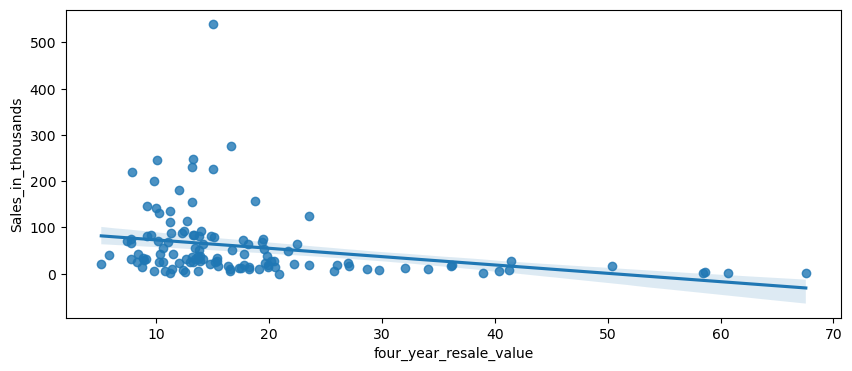

In [49]:
plt.figure(figsize=(10,4))
sns.regplot(data=df, x=df["four_year_resale_value"], y=df["Sales_in_thousands"])
plt.show()

In [50]:
df[["Sales_in_thousands", "four_year_resale_value"]].corr()

,Sales_in_thousands,four_year_resale_value
Sales_in_thousands,1.000000,-0.279034
four_year_resale_value,-0.279034,1.000000


In [51]:
# as the relation of four_year_resale_value with Sales is very low so we can remove this variable 
# but we are not removing this to check its effect in machine learning model ( as we are learning)

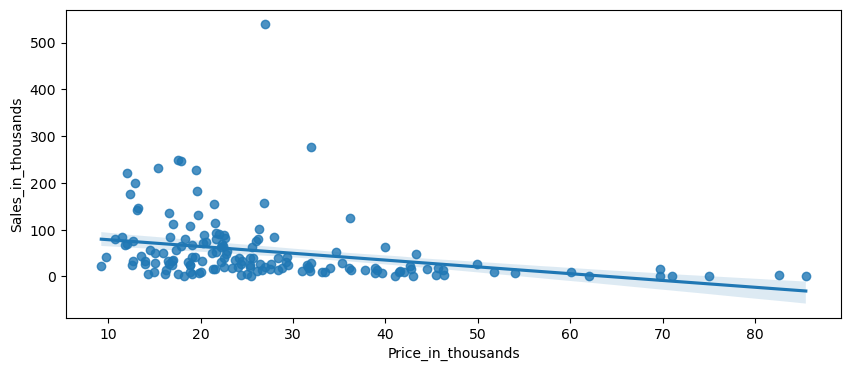

In [52]:
plt.figure(figsize=(10,4))
sns.regplot(data=df, x=df["Price_in_thousands"], y=df["Sales_in_thousands"])
plt.show()

In [53]:
df[["Sales_in_thousands", "Price_in_thousands"]].corr()

,Sales_in_thousands,Price_in_thousands
Sales_in_thousands,1.000000,-0.304734
Price_in_thousands,-0.304734,1.000000


In [54]:
# the raltion of Price_in_thousands to Sales is just ok , we should not drop this variable as
# it also make sense in business term

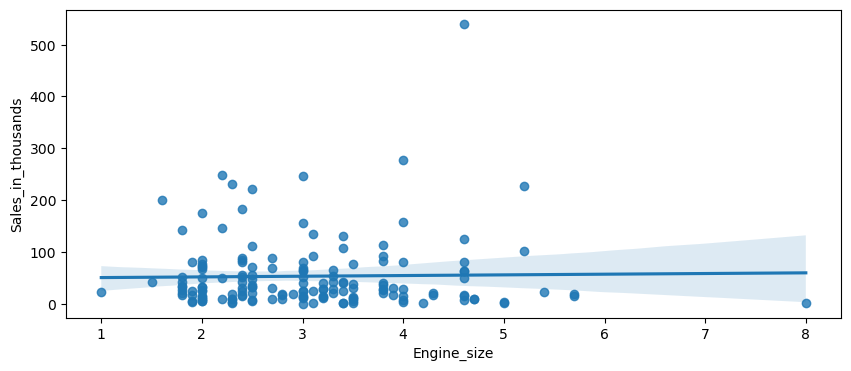

In [55]:
plt.figure(figsize=(10,4))
sns.regplot(data=df, x=df["Engine_size"], y=df["Sales_in_thousands"])
plt.show()

In [56]:
df[["Sales_in_thousands", "Engine_size"]].corr()

,Sales_in_thousands,Engine_size
Sales_in_thousands,1.000000,0.019983
Engine_size,0.019983,1.000000


In [57]:
# Categorical to Numerical ( Manufacturer- Sales)

In [58]:
df["Manufacturer"].nunique()  # no of unique values 

30

In [59]:
df["Manufacturer"].unique()

array(['Acura', 'Audi', 'BMW', 'Buick', 'Cadillac', 'Chevrolet',
       'Chrysler', 'Dodge', 'Ford', 'Honda', 'Hyundai', 'Infiniti',
       'Jaguar', 'Jeep', 'Lexus', 'Lincoln', 'Mitsubishi', 'Mercury',
       'Mercedes-B', 'Nissan', 'Oldsmobile', 'Plymouth', 'Pontiac',
       'Porsche', 'Saab', 'Saturn', 'Subaru', 'Toyota', 'Volkswagen',
       'Volvo'], dtype=object)

In [60]:
df.columns

Index(['Manufacturer', 'Model', 'Sales_in_thousands', 'four_year_resale_value',
       'Vehicle_type', 'Price_in_thousands', 'Engine_size', 'Horsepower',
       'Wheelbase', 'Width', 'Length', 'Curb_weight', 'Fuel_capacity',
       'Fuel_efficiency', 'Latest_Launch', 'Power_perf_factor'],
      dtype='object')

In [61]:
df.groupby(["Vehicle_type"]).agg({"Sales_in_thousands":["min", "max", "count"]})

Sales_in_thousands               
                            min      max count
Vehicle_type                                  
Car                       9.126  540.561    41
Passenger                 0.110  247.994   116

In [62]:
a=pd.DataFrame(df.groupby(["Vehicle_type"]).agg({"Sales_in_thousands":["mean"]})).reset_index()
a.columns=["Vehicle_type", "Avg_sale"]
a

,Vehicle_type,Avg_sale
0,Car,80.622293
1,Passenger,43.234345


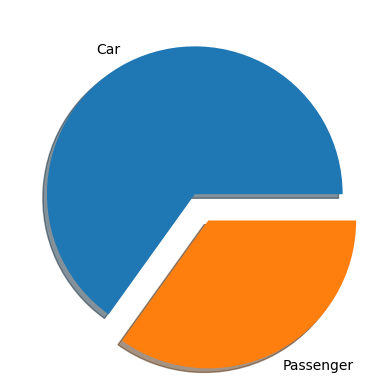

In [63]:
plt.pie(x=a["Avg_sale"],labels=a["Vehicle_type"], explode=[0,.2], shadow=True)
plt.show()

In [64]:
# Null = avg_sale_car=avg_sale_passanger (No relationship between vehicle type to Sale)
# alter = avg_sale_car <> avg_sale_passanger (relationship between vehicle type to Sale)
# test- two sample t test

In [65]:
car=df[df["Vehicle_type"]=="Car"]
passenger=df[df["Vehicle_type"]!="Car"]

In [66]:
stats.ttest_ind(car["Sales_in_thousands"], passenger["Sales_in_thousands"])

TtestResult(statistic=3.1076673920909745, pvalue=0.0022437086557697637, df=155.0)

In [67]:
# # Feature Engineering :-It is the process of creating new features or trasnforming existing 
# # features to improve the performance of a machine learning model
# 1. Feature creation
# 2. Feature transformation 
#     1. rescaling -> transform each variable into the scale - MinMax Scaler, standardization, normaization
#     2. Encoding -> transform categorical variable into numerical variable- dummy creation, One- hot coding, lable encoder etc..
#     3. Transformation using maths operations - log, square root 
# 3. Feature Extraction 
#     a. Dimension reduction - PCA
#     b. Feature combine 
#     etc...
# 4. Missing value treatment 
# 5. Outlier Treatment 
# etc....


In [68]:
df.head(2)

,Manufacturer,Model,Sales_in_thousands,four_year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.5,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2012-02-02,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.4,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,2011-06-03,91.370778


In [69]:
df["area"]=df["Width"]*df["Length"]  # Feature Creations
#  Age of car - current_date - latest_launch

In [70]:
# import datetime

In [71]:
# datetime.date.today()-df["Latest_Launch"]

### Outlier treatment 

In [74]:
# selecting numerical columns
df.dtypes[df.dtypes!="object"].index  

Index(['Sales_in_thousands', 'four_year_resale_value', 'Price_in_thousands',
       'Engine_size', 'Horsepower', 'Wheelbase', 'Width', 'Length',
       'Curb_weight', 'Fuel_capacity', 'Fuel_efficiency', 'Latest_Launch',
       'Power_perf_factor', 'area'],
      dtype='object')

In [75]:
#subsetting numerical data
num_data=df[['Sales_in_thousands', 'four_year_resale_value', 'Price_in_thousands',
       'Engine_size', 'Horsepower', 'Wheelbase', 'Width', 'Length',
       'Curb_weight', 'Fuel_capacity', 'Fuel_efficiency', 
       'Power_perf_factor', 'area']]

In [78]:
# num_data

#### detect outliers

In [80]:
# Percentile Method 
num_data.describe(percentiles=[0.01,.02,.03,.04,.05,.1,.25,.5,.75, .9, .95, .96, .97,.98,.99]).T

,count,mean,std,min,1%,2%,3%,4%,5%,10%,25%,50%,75%,90%,95%,96%,97%,98%,99%,max
Sales_in_thousands,157.0,52.998076,68.029422,0.110000,0.93728,1.132160,1.348000,1.607600,1.870800,5.453600,14.114000,29.450000,67.956000,127.641600,185.336200,215.618400,228.290120,244.025440,260.645320,540.561000
four_year_resale_value,121.0,18.072975,11.453384,5.160000,6.17300,7.555000,7.750000,7.810000,7.850000,9.125000,11.260000,14.180000,19.875000,32.075000,41.250000,43.235000,53.613000,58.548000,60.220000,67.550000
Price_in_thousands,155.0,27.390755,14.351653,9.235000,10.23144,11.549680,11.954620,12.109200,12.469000,13.970800,18.017500,22.799000,31.947500,44.017000,55.835000,61.696800,69.709500,70.916400,78.479800,85.500000
Engine_size,156.0,3.060897,1.044653,1.000000,1.55500,1.800000,1.800000,1.800000,1.800000,1.950000,2.300000,3.000000,3.575000,4.600000,4.775000,5.000000,5.200000,5.380000,5.700000,8.000000
Horsepower,156.0,185.948718,56.700321,55.000000,96.40000,100.600000,106.650000,110.600000,114.500000,120.000000,149.500000,177.500000,215.000000,254.000000,300.000000,300.000000,300.700000,302.000000,325.750000,450.000000
Wheelbase,156.0,107.487179,7.641303,92.600000,92.87500,93.510000,94.500000,94.960000,95.875000,98.650000,103.000000,107.000000,112.200000,115.500000,119.250000,120.000000,120.980000,126.630000,134.375000,138.700000
Width,156.0,71.150000,3.451872,62.600000,66.08500,66.400000,66.465000,66.500000,66.500000,66.900000,68.400000,70.550000,73.425000,76.200000,78.200000,78.200000,78.735000,78.800000,79.190000,79.900000
Length,156.0,187.343590,13.431754,149.400000,154.91500,158.150000,160.855000,163.300000,163.675000,173.000000,177.575000,187.900000,196.125000,203.400000,208.500000,208.980000,212.000000,214.700000,219.305000,224.500000
Curb_weight,155.0,3.378026,0.630502,1.895000,2.24540,2.332560,2.356360,2.401520,2.423500,2.606200,2.971000,3.342000,3.799500,4.118600,4.389100,4.457840,4.629440,5.090440,5.396680,5.572000
Fuel_capacity,156.0,17.951923,3.887921,10.300000,11.90000,12.010000,12.100000,12.180000,12.500000,13.200000,15.800000,17.200000,19.575000,23.200000,25.400000,25.880000,26.000000,29.600000,30.900000,32.000000


In [81]:
def outlier_cap_percentile(x):
    x=x.clip(upper=x.quantile(.99))
#     x=x.clip(lower=x.quantile(.01))
    return x

In [82]:
num_data1=num_data.apply(outlier_cap_percentile)  # here the function will be used on each variable

In [83]:
# Percentile Method 
num_data1.describe(percentiles=[0.01,.02,.03,.04,.05,.1,.25,.5,.75, .9, .95, .96, .97,.98,.99]).T

,count,mean,std,min,1%,2%,3%,4%,5%,10%,25%,50%,75%,90%,95%,96%,97%,98%,99%,max
Sales_in_thousands,157.0,51.112616,57.727465,0.110000,0.93728,1.132160,1.348000,1.607600,1.870800,5.453600,14.114000,29.450000,67.956000,127.641600,185.336200,215.618400,228.290120,244.025440,253.560581,260.645320
four_year_resale_value,121.0,18.009050,11.193450,5.160000,6.17300,7.555000,7.750000,7.810000,7.850000,9.125000,11.260000,14.180000,19.875000,32.075000,41.250000,43.235000,53.613000,58.548000,59.896000,60.220000
Price_in_thousands,155.0,27.318881,14.076324,9.235000,10.23144,11.549680,11.954620,12.109200,12.469000,13.970800,18.017500,22.799000,31.947500,44.017000,55.835000,61.696800,69.709500,70.916400,76.584508,78.479800
Engine_size,156.0,3.046154,0.989257,1.000000,1.55500,1.800000,1.800000,1.800000,1.800000,1.950000,2.300000,3.000000,3.575000,4.600000,4.775000,5.000000,5.200000,5.380000,5.700000,5.700000
Horsepower,156.0,185.028846,53.415595,55.000000,96.40000,100.600000,106.650000,110.600000,114.500000,120.000000,149.500000,177.500000,215.000000,254.000000,300.000000,300.000000,300.700000,302.000000,317.087500,325.750000
Wheelbase,156.0,107.433013,7.431316,92.600000,92.87500,93.510000,94.500000,94.960000,95.875000,98.650000,103.000000,107.000000,112.200000,115.500000,119.250000,120.000000,120.980000,126.630000,132.518750,134.375000
Width,156.0,71.144744,3.439040,62.600000,66.08500,66.400000,66.465000,66.500000,66.500000,66.900000,68.400000,70.550000,73.425000,76.200000,78.200000,78.200000,78.735000,78.800000,79.140500,79.190000
Length,156.0,187.278910,13.263406,149.400000,154.91500,158.150000,160.855000,163.300000,163.675000,173.000000,177.575000,187.900000,196.125000,203.400000,208.500000,208.980000,212.000000,214.700000,217.102250,219.305000
Curb_weight,155.0,3.376867,0.626595,1.895000,2.24540,2.332560,2.356360,2.401520,2.423500,2.606200,2.971000,3.342000,3.799500,4.118600,4.389100,4.457840,4.629440,5.090440,5.394693,5.396680
Fuel_capacity,156.0,17.937821,3.838302,10.300000,11.90000,12.010000,12.100000,12.180000,12.500000,13.200000,15.800000,17.200000,19.575000,23.200000,25.400000,25.880000,26.000000,29.600000,30.405000,30.900000


### missing value treatment on numerical data

In [84]:
# Detection of missing value
num_data1.isnull().sum()  

Sales_in_thousands         0
four_year_resale_value    36
Price_in_thousands         2
Engine_size                1
Horsepower                 1
Wheelbase                  1
Width                      1
Length                     1
Curb_weight                2
Fuel_capacity              1
Fuel_efficiency            3
Power_perf_factor          2
area                       1
dtype: int64

In [85]:
# missing value treatment
a=num_data1.dropna() # delete

In [86]:
a.shape

(117, 13)

In [87]:
num_data1.shape

(157, 13)

In [88]:
157-117

40

In [89]:
40/157

0.25477707006369427

In [94]:
num_data1

,Sales_in_thousands,four_year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor,area
0,16.919,16.360,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,58.280150,11602.52
1,39.384,19.875,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,91.370778,13560.87
2,14.114,18.225,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,NaN,13555.20
3,8.588,29.725,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,91.389779,14037.24
4,20.397,22.255,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,62.777639,12139.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,3.545,NaN,24.40,1.9,160.0,100.5,67.6,176.6,3.042,15.8,25.0,66.498812,11938.16
153,15.245,NaN,27.50,2.4,168.0,104.9,69.3,185.9,3.208,17.9,25.0,70.654495,12882.87
154,17.531,NaN,28.80,2.4,168.0,104.9,69.3,186.2,3.259,17.9,25.0,71.155978,12903.66
155,3.493,NaN,45.50,2.3,236.0,104.9,71.5,185.7,3.601,18.5,23.0,101.623357,13277.55


In [99]:
# # missing value treatment - imputation
# num_data1.fillna(num_data1.mean()) # fill mean of each column to respective missing value of the columns
# num_data1.fillna(num_data1.median())# fill median of each column to respective missing value of the columns
# num_data1.fillna(method="ffill")
# num_data1.fillna(method="bfill")
# num_data1.fillna(value=0)

In [100]:
num_data2=num_data1.fillna(num_data1.mean()) # filling missing value with mean 

#### combine numerical and categorical data

In [101]:
df.dtypes[df.dtypes=="object"].index

Index(['Manufacturer', 'Model', 'Vehicle_type'], dtype='object')

In [102]:
cat_data=df[['Manufacturer', 'Model', 'Vehicle_type']]

In [104]:
new_df=pd.concat([cat_data, num_data2], axis=1)
new_df.shape

(157, 16)

In [107]:
new_df["Manufacturer"].nunique()

30

In [111]:
new_df.drop(columns=["Manufacturer", "Model"], inplace=True)

### creating dummies

In [122]:
new_df_dummy=pd.get_dummies(data=new_df, columns=["Vehicle_type"], drop_first=True, dtype="int")
new_df_dummy

,Sales_in_thousands,four_year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor,area,Vehicle_type_Passenger
0,16.919,16.36000,21.500000,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,58.280150,11602.52,1
1,39.384,19.87500,28.400000,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,91.370778,13560.87,1
2,14.114,18.22500,27.318881,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,76.740065,13555.20,1
3,8.588,29.72500,42.000000,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,91.389779,14037.24,1
4,20.397,22.25500,23.990000,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,62.777639,12139.60,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,3.545,18.00905,24.400000,1.9,160.0,100.5,67.6,176.6,3.042,15.8,25.0,66.498812,11938.16,1
153,15.245,18.00905,27.500000,2.4,168.0,104.9,69.3,185.9,3.208,17.9,25.0,70.654495,12882.87,1
154,17.531,18.00905,28.800000,2.4,168.0,104.9,69.3,186.2,3.259,17.9,25.0,71.155978,12903.66,1
155,3.493,18.00905,45.500000,2.3,236.0,104.9,71.5,185.7,3.601,18.5,23.0,101.623357,13277.55,1


In [138]:
new_df_dummy.isnull().sum()

Sales_in_thousands        0
four_year_resale_value    0
Price_in_thousands        0
Engine_size               0
Horsepower                0
Wheelbase                 0
Width                     0
Length                    0
Curb_weight               0
Fuel_capacity             0
Fuel_efficiency           0
Power_perf_factor         0
area                      0
Vehicle_type_Passenger    0
dtype: int64

### Checking assumptions of linear regression

In [139]:
new_df_dummy["Sales_in_thousands"] # y is continuous

0      16.919
1      39.384
2      14.114
3       8.588
4      20.397
        ...  
152     3.545
153    15.245
154    17.531
155     3.493
156    18.969
Name: Sales_in_thousands, Length: 157, dtype: float64

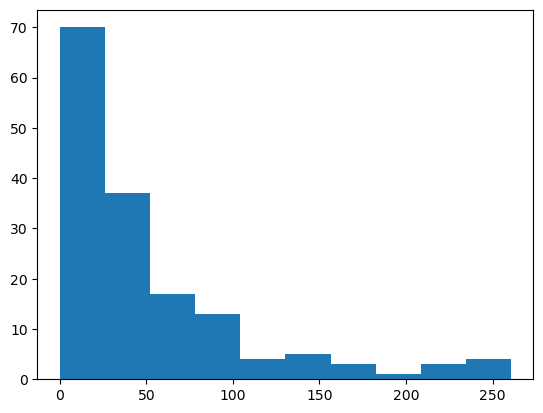

In [140]:
# y should be normally distributed 
plt.hist(new_df_dummy["Sales_in_thousands"])
plt.show()

In [127]:
from scipy import stats

In [128]:
# stats.shapiro  # When rows are less than 5000 
# stats.jarque_bera # when rows are more than or equal to 5000
# Null : data is  normal
# Alternative : data is not  normal

In [141]:
stats.shapiro(new_df_dummy["Sales_in_thousands"])

ShapiroResult(statistic=0.7552341117128591, pvalue=6.811491171418018e-15)

ShapiroResult(statistic=0.9831062855545168, pvalue=0.05210771586500871)


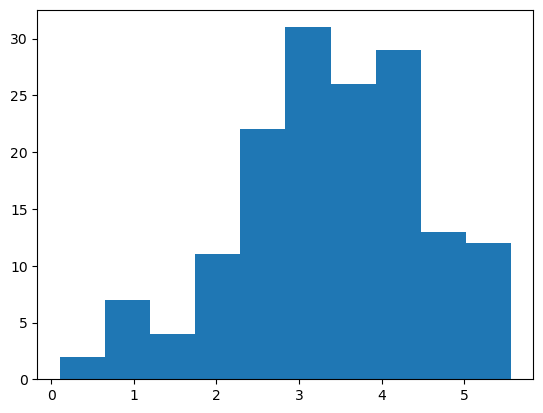

In [142]:
new_df_dummy["transformed_sale"]=np.log1p(new_df_dummy["Sales_in_thousands"])
print(stats.shapiro(new_df_dummy["transformed_sale"]))
plt.hist(new_df_dummy["transformed_sale"])
plt.show()

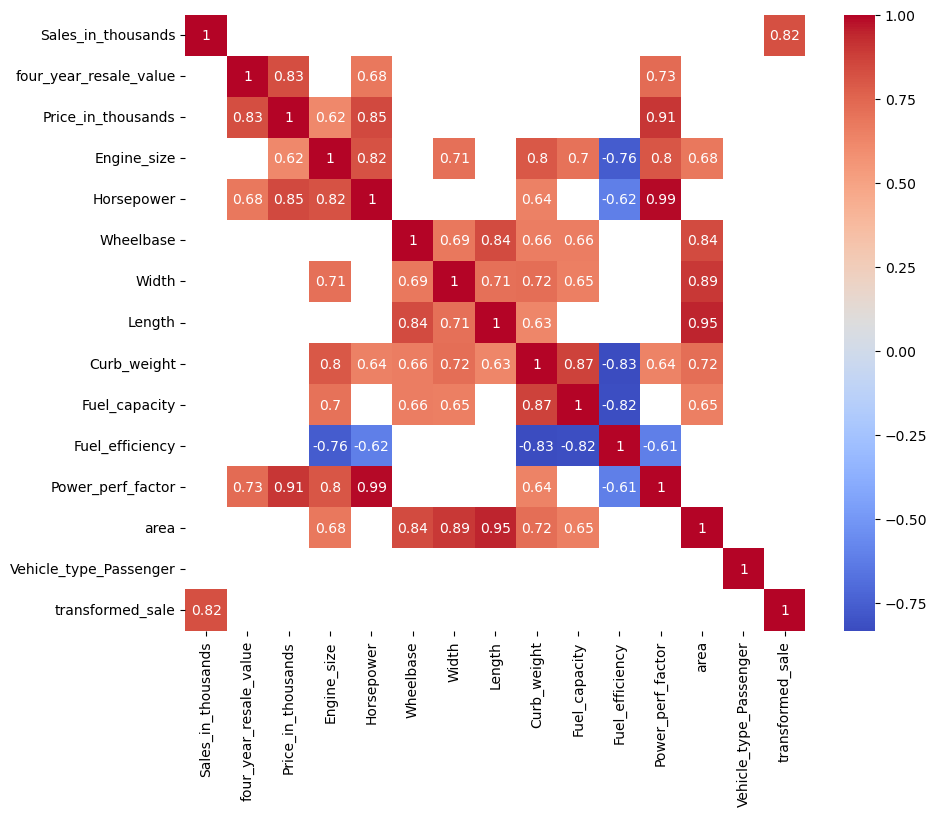

In [147]:
# Multicollinearity 
plt.figure(figsize=(10,8))
cr=new_df_dummy.corr()
cr=cr[abs(cr)>.6]
sns.heatmap(cr, annot=True, cmap="coolwarm")
plt.show()

In [148]:
import statsmodels # linear regression
# import sklearn  # linear Regression 

In [149]:
new_df_dummy.columns

Index(['Sales_in_thousands', 'four_year_resale_value', 'Price_in_thousands',
       'Engine_size', 'Horsepower', 'Wheelbase', 'Width', 'Length',
       'Curb_weight', 'Fuel_capacity', 'Fuel_efficiency', 'Power_perf_factor',
       'area', 'Vehicle_type_Passenger', 'transformed_sale'],
      dtype='object')

In [170]:
y=new_df_dummy["transformed_sale"]
x=new_df_dummy[['Price_in_thousands',
       'Engine_size', 'Wheelbase',
        'Fuel_efficiency', 'Vehicle_type_Passenger']]

In [171]:
import statsmodels.api as sm

x_train=sm.add_constant(x)
model=sm.OLS(y, x_train)  # linear Regression - OLS ordinary least square method 
results=model.fit()  # training the model
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:       transformed_sale   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.476
Method:                 Least Squares   F-statistic:                     29.33
Date:                Sat, 24 Aug 2024   Prob (F-statistic):           9.97e-21
Time:                        13:19:55   Log-Likelihood:                -192.37
No. Observations:                 157   AIC:                             396.7
Df Residuals:                     151   BIC:                             415.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -2

In [183]:
# x

In [184]:
# x_train

In [185]:
# x_train.columns

In [202]:
test_data=pd.DataFrame({"const":[1],
                       "Price_in_thousands":[36],
                       "Engine_size":[1.8],
                       "Wheelbase":[120],
                       "Fuel_efficiency":[23],
                       "Vehicle_type_Passenger":[0]})

In [203]:
sale=np.expm1(results.predict(test_data)) 
sale

0    28.439471
dtype: float64